# Import packages

In [1]:
import os
import cmaps
import math
import cmocean
import numpy as np
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset
from datetime import date
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import Polygon
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
rcParams['font.family'] = 'sans-serif'
directory   = '/srv/scratch/z3533156'

# Read SST, EKE, KmKe and PeKe trends

In [2]:
dataset1   = xr.open_dataset(directory+'/BRAN_WBC/SO/AVISO/AVISO_monthly_SSH_LS_detrend.nc')
dataset2   = sio.loadmat(directory+'/BRAN_WBC/SO/Figure2_trend.mat')
aviso_ssh0 = dataset1.adt.mean(axis=0).transpose().values
aviso_ssh  = np.concatenate((aviso_ssh0[720:,:],aviso_ssh0[:720,:]),axis=0)
oisst_lon  = dataset2['oisst_lon'][:,:]
oisst_lat  = dataset2['oisst_lat'][:,:]
aviso_lon  = dataset2['aviso_lon'][:,:]+180
aviso_lat  = dataset2['aviso_lat'][:,:]
bran_lon   = dataset2['bran_lon'][:,:]
bran_lat   = dataset2['bran_lat'][:,:]
sst_trend  = dataset2['sst_trend'][:,:]*3650
eke_trend  = dataset2['eke_trend'][:,:]*3650*100
KmKe_trend = dataset2['KmKe_trend'][:,:]*3650*1e4
PeKe_trend = dataset2['PeKe_trend'][:,:]*3650*1e4
sst_p      = dataset2['sst_p'][:,:]
eke_p      = dataset2['eke_p'][:,:]
KmKe_p     = dataset2['KmKe_p'][:,:]
PeKe_p     = dataset2['PeKe_p'][:,:]
sst_p[np.where(sst_p > 0.05)]   = np.nan
eke_p[np.where(eke_p > 0.05)]   = np.nan
KmKe_p[np.where(KmKe_p > 0.05)] = np.nan
PeKe_p[np.where(PeKe_p > 0.05)] = np.nan

# Plot the spatial distribution of SST, EKE KmKe and PeKe trends

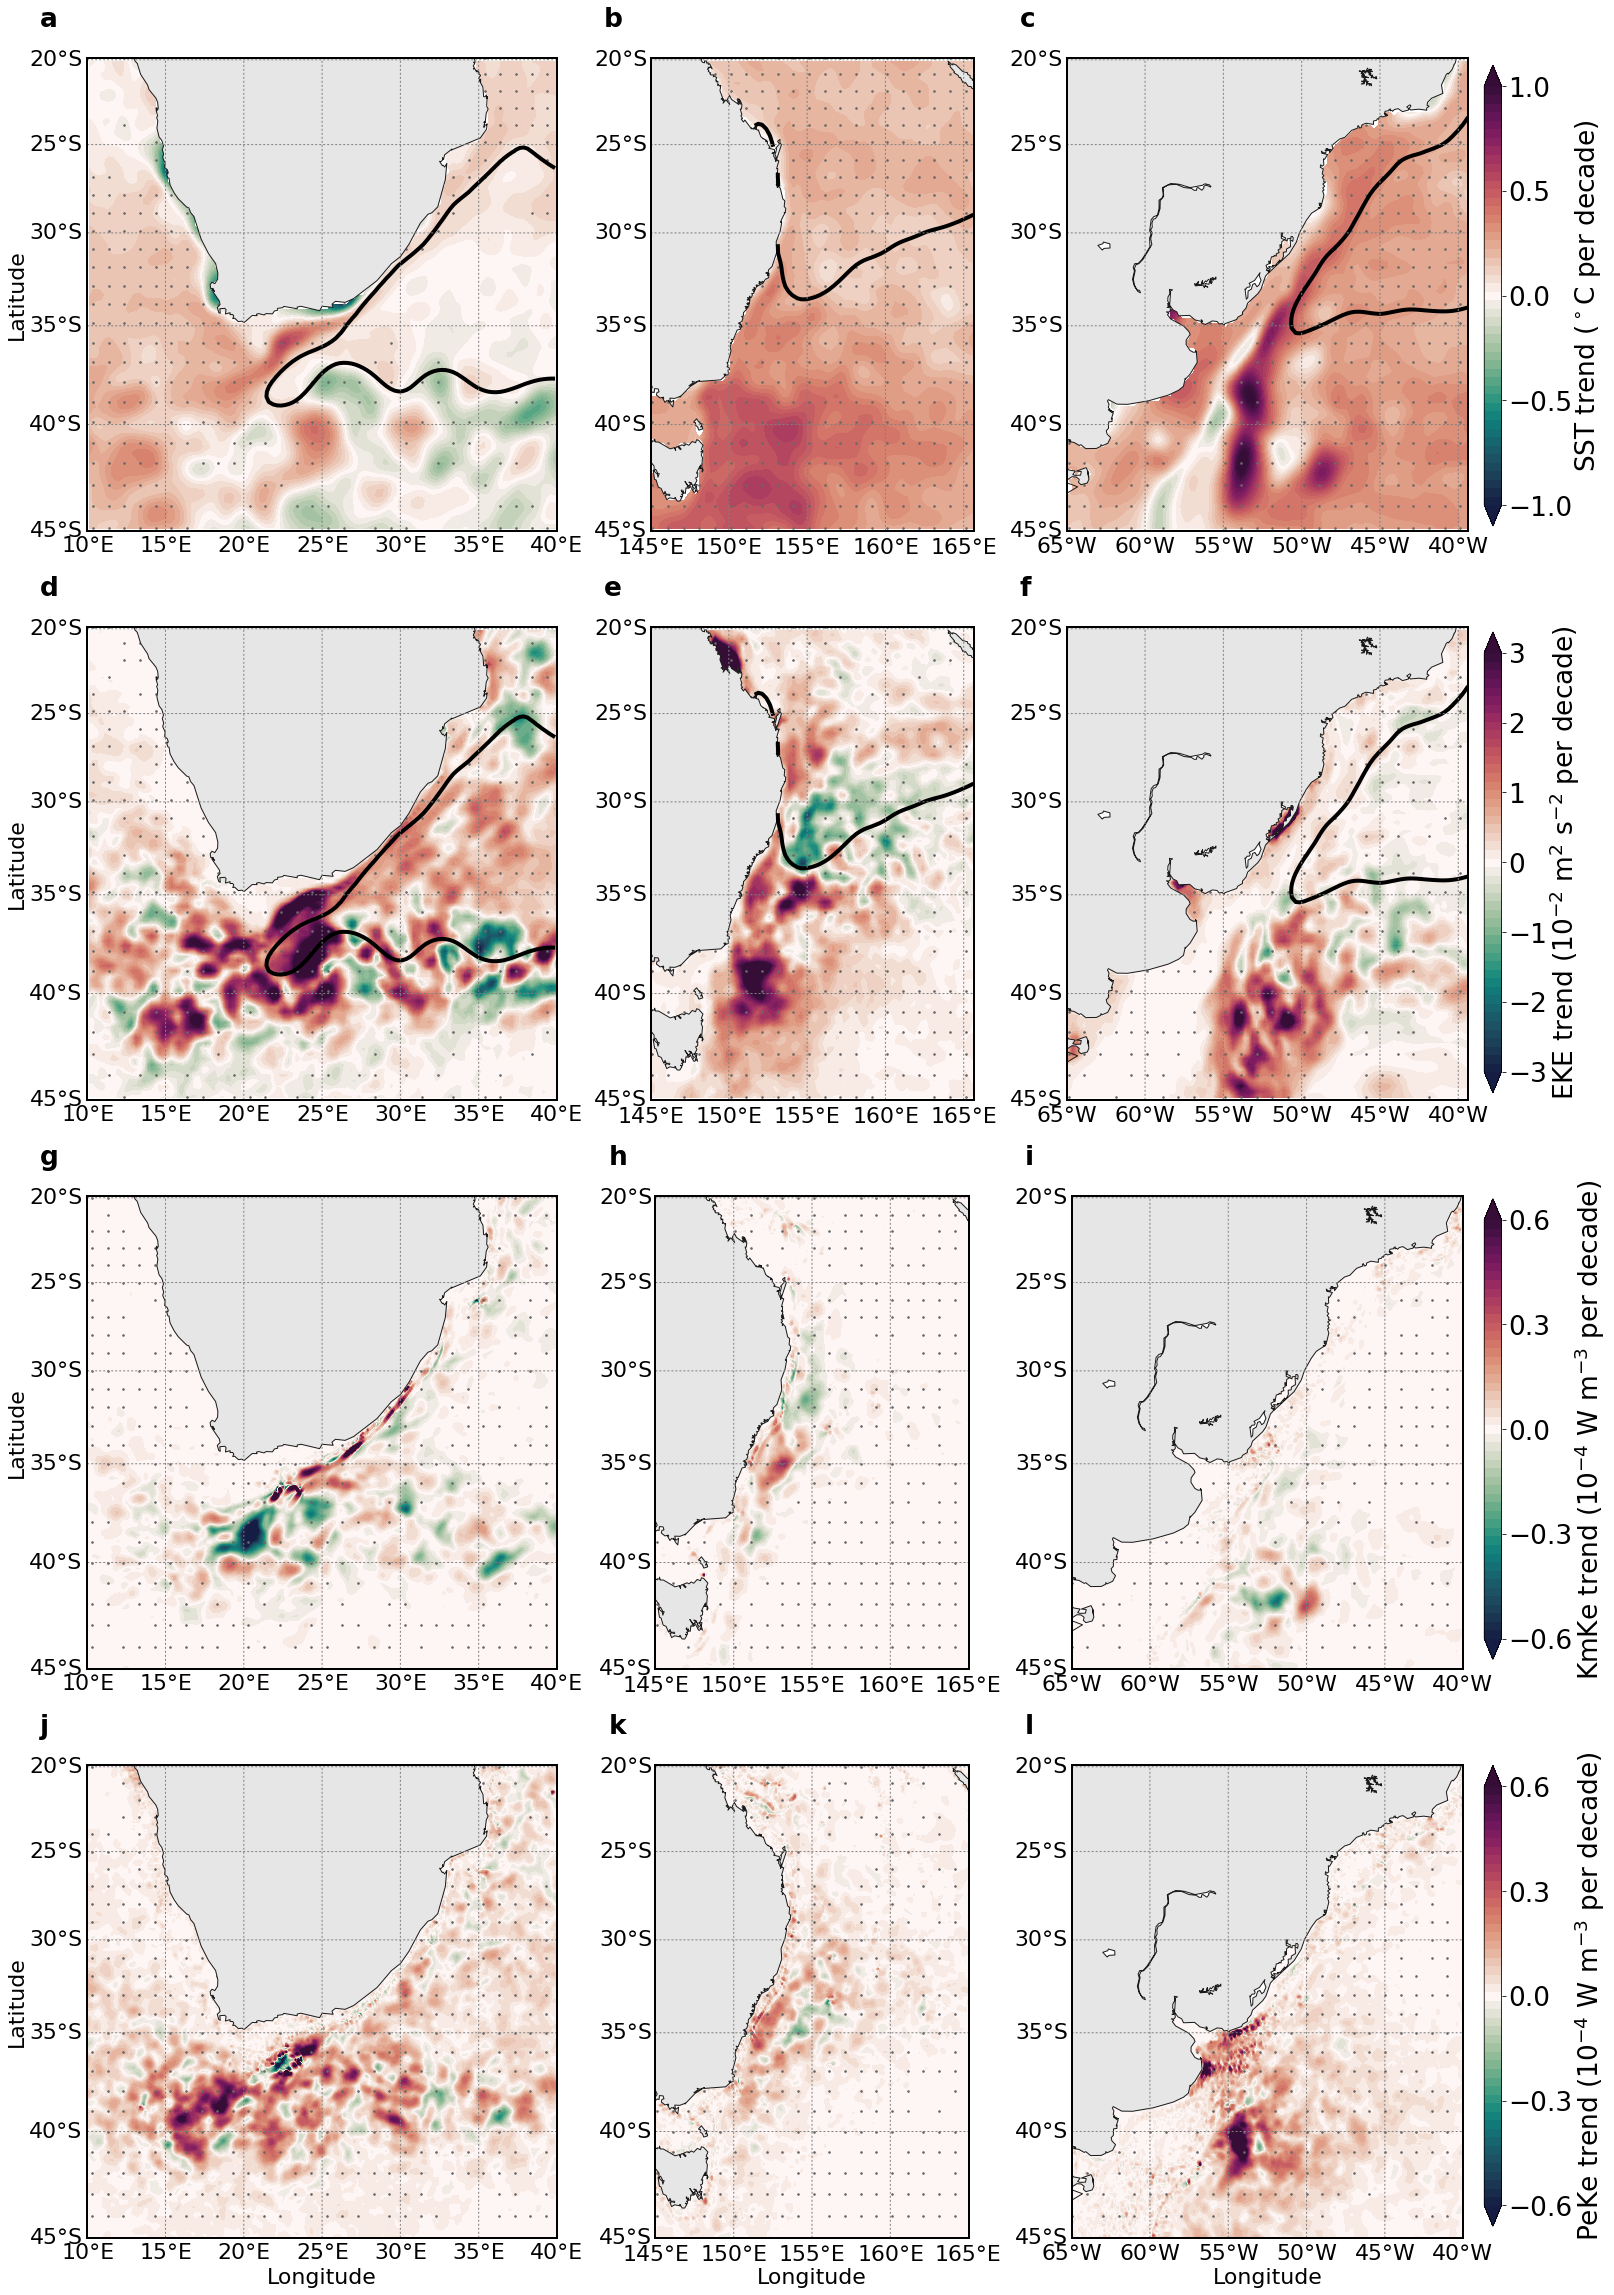

In [6]:
##############################################################################################################
labels      = ['a','b','c','d','e','f','g','h','i','j','k','l']
levels1     = np.linspace(-1,1,50)
levels2     = np.linspace(-3,3,50)
levels3     = np.linspace(-0.6,0.6,50)
tick_marks1 = np.linspace(-1,1,5)
tick_marks2 = np.linspace(-3,3,7)
tick_marks3 = np.linspace(-0.6,0.6,5)
cmaps1      = cmaps.cmocean_curl
fig_ratio   = 0.9
fig         = plt.figure(figsize=(24, 32))
gs          = gridspec.GridSpec(4,3)
labelfont   = 22
padspacescale = 10
labelpadscale = 2
linefont    = 1
scale       = 1.25
m_scale     = 10 
##############################################################################################################
for i in range(12):
    if i==0:
        lon       = aviso_lon[0:202,60:204]      
        lat       = aviso_lat[0:202,60:204]      
        var_ssh   = aviso_ssh[0:202,60:204]      
        ssh_level = np.arange(0.899,0.901,10)
        var_trend = sst_trend[0:202,60:204]        
        var_p     = sst_p[0:202,60:204]        
    elif i==1:
        lon       = aviso_lon[579:663,60:164]      
        lat       = aviso_lat[579:663,60:164]  
        var_ssh   = aviso_ssh[579:663,60:164]  
        ssh_level = np.arange(0.899,0.901,10)
        var_trend = sst_trend[579:663,60:164]  
        var_p     = sst_p[579:663,60:164]  
    elif i==2:
        lon       = aviso_lon[1179:1283,40:164]      
        lat       = aviso_lat[1179:1283,40:164]    
        var_ssh   = aviso_ssh[1179:1283,40:164]    
        ssh_level = np.arange(0.599,0.601,10)
        var_trend = sst_trend[1179:1283,40:164]    
        var_p     = sst_p[1179:1283,40:164]    
    elif i==3:
        lon       = aviso_lon[0:202,60:204]           
        lat       = aviso_lat[0:202,60:204]       
        var_ssh   = aviso_ssh[0:202,60:204]      
        ssh_level = np.arange(0.899,0.901,10)   
        var_trend = eke_trend[0:202,60:204]        
        var_p     = eke_p[0:202,60:204]        
    elif i==4:
        lon       = aviso_lon[579:663,60:164]      
        lat       = aviso_lat[579:663,60:164]  
        var_ssh   = aviso_ssh[579:663,60:164]   
        ssh_level = np.arange(0.899,0.901,10)
        var_trend = eke_trend[579:663,60:164]     
        var_p     = eke_p[579:663,60:164]     
    elif i==5:
        lon       = aviso_lon[1179:1283,40:164]      
        lat       = aviso_lat[1179:1283,40:164]     
        var_ssh   = aviso_ssh[1179:1283,40:164]    
        ssh_level = np.arange(0.599,0.601,10)
        var_trend = eke_trend[1179:1283,40:164]    
        var_p     = eke_p[1179:1283,40:164]        
    elif i==6:
        lon       = bran_lon[1:500,150:505]      
        lat       = bran_lat[1:500,150:505]   
        var_trend = KmKe_trend[1:500,150:505]
        var_p     = KmKe_p[1:500,150:505]
    elif i==7:
        lon       = bran_lon[1449:1650,150:405]      
        lat       = bran_lat[1449:1650,150:405]      
        var_trend = KmKe_trend[1449:1650,150:405]      
        var_p     = KmKe_p[1449:1650,150:405]      
    elif i==8:
        lon       = bran_lon[2948:3200,100:405]           
        lat       = bran_lat[2948:3200,100:405]      
        var_trend = KmKe_trend[2948:3200,100:405]      
        var_p     = KmKe_p[2948:3200,100:405]      
    elif i==9:
        lon       = bran_lon[1:500,150:505]      
        lat       = bran_lat[1:500,150:505]   
        var_trend = PeKe_trend[1:500,150:505]
        var_p     = PeKe_p[1:500,150:505]
    elif i==10:
        lon       = bran_lon[1449:1650,150:405]           
        lat       = bran_lat[1449:1650,150:405]       
        var_trend = PeKe_trend[1449:1650,150:405]      
        var_p     = PeKe_p[1449:1650,150:405]      
    else:
        lon       = bran_lon[2948:3200,100:405]          
        lat       = bran_lat[2948:3200,100:405]       
        var_trend = PeKe_trend[2948:3200,100:405]      
        var_p     = PeKe_p[2948:3200,100:405]      
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    ax = fig.add_subplot(gs[i])
    l, b, w, h = ax.get_position().bounds
    
    if np.mod(i,3)==0:     
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=10,urcrnrlon=40,resolution='l')    
        plt.ylabel('Latitude',fontsize=labelfont,labelpad=6*padspacescale,family='sans-serif')
        cx,cy = m(7, -18.0)
    elif np.mod(i,3)==1:
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=145,urcrnrlon=np.nanmax(lon),resolution='l')    
        cx,cy  = m(142, -18.0)
        l=l+0.01
    else:
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=295,urcrnrlon=np.nanmax(lon),resolution='l')    
        cx,cy  = m(292, -18.0)
        
    m.drawparallels(np.arange(-60,-0, 5),labels=[1,0,0,0],linewidth=linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')    
    m.drawmeridians(np.arange(0,360, 5),labels=[0,0,0,1],linewidth=linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')
    m.drawcoastlines(color='0.1',  linewidth=linefont)
    m.fillcontinents(color='0.9', lake_color='white')
    
    x, y = m(lon, lat)
    if i<6:
        yy = np.arange(1, y.shape[0], 4)
        xx = np.arange(1, x.shape[1], 4)
    else:
        yy = np.arange(1, y.shape[0], 10)
        xx = np.arange(1, x.shape[1], 10)
    points      = np.meshgrid(yy, xx)
    point_index = tuple(points)
    point_x     = x[point_index]
    point_y     = y[point_index]
    point_z     = var_p[point_index]
    point_x     = np.ravel(point_x)
    point_y     = np.ravel(point_y)
    point_z     = np.ravel(point_z)
    point_x     = point_x[~np.isnan(point_z)]
    point_y     = point_y[~np.isnan(point_z)]
    
    if i<3:
        b=b+0.0
        CB1=m.contourf(x, y, var_trend,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS = m.contour(x, y, var_ssh,ssh_level,linewidths=4*linefont,linestyles='solid',colors='black')
    elif i<6:
        b=b-0.05
        CB2=m.contourf(x, y, var_trend,cmap=cmaps1,levels=levels2,origin='lower',extend='both')
        CS = m.contour(x, y, var_ssh,ssh_level,linewidths=4*linefont,linestyles='solid',colors='black')
    elif i<9:
        b=b-0.1
        CB3=m.contourf(x, y, var_trend,cmap=cmaps1,levels=levels3,origin='lower',extend='both')
    else:
        b=b-0.15
        CB4=m.contourf(x, y, var_trend,cmap=cmaps1,levels=levels3,origin='lower',extend='both')
        plt.xlabel('Longitude',fontsize=labelfont,labelpad=3*padspacescale,family='sans-serif')
        
    CS=m.scatter(point_x,point_y,s=m_scale,c='dimgray',marker='.') 
    m.plot(x[0,:],  y[0,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,0],  y[:,0],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[-1,:], y[-1,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,-1], y[:,-1],linewidth=linefont, linestyle='solid', color='k')
    ax.spines['left'].set_linewidth(labelpadscale)
    ax.spines['top'].set_linewidth(labelpadscale)
    ax.spines['right'].set_linewidth(labelpadscale)
    ax.spines['bottom'].set_linewidth(labelpadscale)
    plt.tick_params(axis='x',which='major',bottom='on',left='on',top='on',right='on',\
                length=25,width=2,colors='black',direction='out')
    plt.text(cx, cy,labels[i],color='xkcd:black', fontsize=1.2*labelfont, weight='bold',family='sans-serif')
    ax.set_position([l, b, scale*w, scale*h])  
    if np.mod(i,3)==0:
        ax.set_position([l, b, scale*w, scale*h])   
    elif np.mod(i,3)==1:
        ax.set_position([l, b, scale*w, scale*h])   
    else:
        ax.set_position([l, b, scale*w, scale*h]) 
        
cbaxes1     = fig.add_axes([0.94, 0.718, 0.01, 0.2])
cb1 = plt.colorbar(CB1,orientation='vertical',cax = cbaxes1)
cb1.set_ticks(tick_marks1)
cb1.ax.tick_params(labelsize=1.2*labelfont)
cb1.set_label(r'SST trend ($^\circ$C per decade)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes2     = fig.add_axes([0.94, 0.472, 0.01, 0.2])
cb2 = plt.colorbar(CB2,orientation='vertical',cax = cbaxes2)
cb2.set_ticks(tick_marks2)
cb2.ax.tick_params(labelsize=1.2*labelfont)
cb2.set_label(r'EKE trend (10$^{-2}$ m$^{2}$ s$^{-2}$ per decade)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes3     = fig.add_axes([0.94, 0.226, 0.01, 0.2])
cb3 = plt.colorbar(CB3,orientation='vertical',cax = cbaxes3)
cb3.set_ticks(tick_marks3)
cb3.ax.tick_params(labelsize=1.2*labelfont)
cb3.set_label(r'KmKe trend (10$^{-4}$ W m$^{-3}$ per decade)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes4     = fig.add_axes([0.94, -0.02, 0.01, 0.2])
cb4 = plt.colorbar(CB4,orientation='vertical',cax = cbaxes4)
cb4.set_ticks(tick_marks3)
cb4.ax.tick_params(labelsize=1.2*labelfont)
cb4.set_label(r'PeKe trend (10$^{-4}$ W m$^{-3}$ per decade)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
fig.savefig(directory+'/BRAN_WBC/SO/Figure2_sst_eke_kmke_peke.pdf',dpi=300,bbox_inches = 'tight')